# Week 3 GRAPPA Seminar Assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

### Define the units

In [2]:
# length
cm = 1
m = 1e2 * cm
km = 1e3 * m
pc = 3.1e18 * cm
Mpc = 1e6 * pc
kpc = 1e3 * pc

# time
s = 1
c = 3e5 * km/s

# mass/energy
GeV = 1
eV = 1e-9 * GeV
kg = 5.61e26 * GeV
M_solar = 2e30 * kg
g = 1e-3 * kg

# other quantities
m_p = 0.938 * GeV
v0 = 220 * km / s / c
N_A = 6.022e23
rho0 = 0.3 * GeV/cm**3

## Part 1: WIMP-proton cross section

\begin{align}
\frac{dR}{dE_{r}} = \frac{R_{0}}{rE_{0}} e^{-E_{r}/rE_{0}}
\end{align}

Integrating R from the threshold energy to infinity gives 

\begin{align}
R = R_{0} e^{-E_{r}/rE_{0}}
\end{align}

where $R_{0}$ corrsponds to

\begin{align}
R_{0} = \frac{N_{A}}{A} \frac{\rho}{m_{\chi}} \sigma_{SI}(\chi + p) \frac{\mu^{2} A^{2}}{m_{p}^{2}} \langle v \rangle
\end{align}

and $\langle v \rangle$ is the average velocity. Rearranging the expression for R to give an expression for $\sigma_{SI}$ as a function of the WIMP particle mass gives

\begin{align}
\sigma_{SI}(\chi + p) = \frac{1}{\mathrm{factor}} R \frac{m_{\chi}}{\mu^{2}} e^{E_{r}/rE_{0}}
\end{align}

where the factor includes all the constants present in R$_{0}$. The value of $\sigma_{SI}(\chi + p)$ can be plotted as a function of the WIMP particle mass. These equations were taken from Particle Cosmology: DM Direct Detection notes from Auke-Pieter Colijn. 

Define the constants necessary for the computations

In [3]:
# problem related quantities
# A = 131.293 * GeV
A = 131.293 * m_p
m_det = 500 * kg
T = 365*24*3600 * s
E_thresh = 3e3 * eV

m_N = A 

# factor_R0 = T * m_det * N_A * rho0 * A * v0 / m_p**2
# factor_R0 = T * m_det * rho0 * A * (2*v0/np.sqrt(np.pi)) / m_p**2     
factor_R0 = T * m_det * N_A * rho0 * A**2 * (2*v0/np.sqrt(np.pi)) / (A * g * m_p**2)

Define functions that return the reduced mass $\mu$, r, E$_{0}$ and the WIMP proton cross-section $\sigma_{SI}$.

In [4]:
def mu(m_x):
#     m_N = A/N_A * GeV/g
    return m_x*m_N / (m_x + m_N)

def r(m_x):
#     m_N = A/N_A * GeV/g
    return 4*m_x*m_N / (m_x + m_N)**2

def E0(m_x):
#     return 0.5*m_x*(2*v0/np.sqrt(np.pi))**2
    return 0.5*m_x*v0**2

def sigma_px(m_x):
    return m_x*c * max_events * np.exp(E_thresh / (r(m_x) * E0(m_x))) / (factor_R0 * mu(m_x)**2 * c**2)


For a WIMP particle with mass of 100 GeV and a confidence level of 95%, calculate the WIMP proton cross-section.

In [5]:
confidence = 95
m_x = 100 * GeV 

max_events = -np.log(1-confidence/100)

print(sigma_px(m_x)) 

1.112360394423267e-47


## Plot the WIMP proton cross-section as a function of the WIMP particle mass

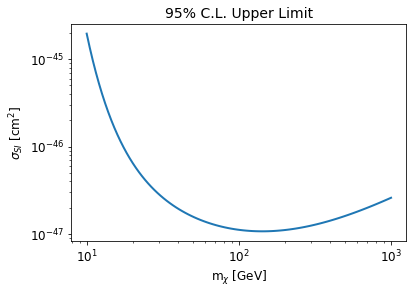

In [6]:
m_arr = np.logspace(1, 3, 100)

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(m_arr, sigma_px(m_arr), lw=2)
ax.set_xlabel(r'm$_{\chi}$ [GeV]', fontsize=12)
ax.set_ylabel(r'$\sigma_{SI}$ [cm$^{2}$]', fontsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_title(r'95% C.L. Upper Limit', fontsize=14)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

## Part 2: Plot 68% and 95% reconstruction contours in the WIMP-proton coupling cross-section vs dark matter mass plane

In [28]:
# Recoil energy between 3 and 10 keV and 10 keV and 20 keV. 
# Mass of WIMP between 10 and 1000 GeV

m_array = np.logspace(1, 3, 20)
sigma_array = np.logspace(-47, -43, 20)

# make a grid
m, sigma = np.meshgrid(m_array, sigma_array)

# The minus sign comes from the integration of dR/dE_r
N1_model = - factor_R0 * sigma * mu(m)**2 * (np.exp(-10e3*eV/(r(m)*E0(m))) - np.exp(-3e3*eV/(r(m)*E0(m)))) / m
N2_model = - factor_R0 * sigma * mu(m)**2 * (np.exp(-20e3*eV/(r(m)*E0(m))) - np.exp(-10e3*eV/(r(m)*E0(m)))) / m

In [27]:
# Chi_squared calculation
N1_observed = 10
N2_observed = 5

def events(confidence): 
     return -np.log(1-confidence/100)

# confidence levels
HL = events(95)
LL = events(68)
    
def chi_squared(N1_observed, N2_observed):
    N1_diff = (N1_model - N1_observed)**2 / N1_model
    N2_diff = (N2_model - N2_observed)**2 / N2_model
    return N1_diff + N2_diff

/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Text(0.5, 1.0, '$\\chi^2$ values')

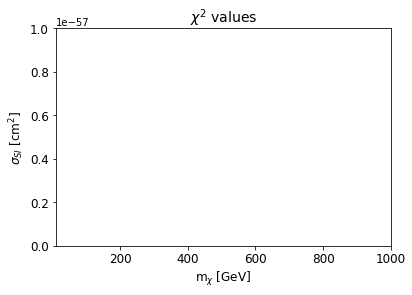

In [12]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(6,4))
CS = ax.contour(m, sigma, chi_squared(N1_observed, N2_observed), levels=[HL,LL])
ax.set_xlabel(r'm$_{\chi}$ [GeV]', fontsize=12)
ax.set_ylabel(r'$\sigma_{SI}$ [cm$^{2}$]', fontsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_title(r'$\chi^2$ values', fontsize=14)

The obtained values for chi squared are not correct, but have not been able to detect the from where is the error coming. We think that is possibly coming from the computation of the constant factor of R0.